In [ ]:
#!git clone https://github.com/meituan/YOLOv6

In [1]:
pip install addict==2.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/code/q03/YOLOv6/

/content


In [7]:
import os
os.chdir("/content/drive/MyDrive/code/q03/YOLOv6")

In [ ]:
#!pip install -r requirements.txt
# AssertionError: Torch not compiled with CUDA enabled

# This requirement file is not installing torch with cuda. So if you want to train your model using gpu then install torch with cuda

# Below torch version works with rtx 3090 (cuda 11.1)
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


In [8]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
# Put your dataset folder in yolov6 folder
# create dataset.yaml

# Train

In [ ]:
#!python tools/train.py --batch 16 --conf configs/yolov6s_finetune.py --data dataset.yaml --device 0 --epochs 50 --eval-interval 2

!python tools/train.py --batch 16 --conf configs/yolov6s_finetune.py --data-path dataset.yaml --device 0 --epochs 100 --eval-interval 2

Using 1 GPU for training... 
training args are: Namespace(batch_size=16, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='dataset.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=2, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp31', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 606/ labels: 606. 
0.1s for dataset initialization.
Convert to COCO format
100% 58/58 [00:00<00:00, 14195.58it/s]
Convert to COCO format finished. Resutls saved in ../data/annotations/instances_val.json
Val: Final numbers of valid images: 58/ labels: 58. 
0.1s for dataset initialization.
Loading state_dict from weights/yolov6s.pt fo

# Evaluation

In [ ]:
#!python tools/eval.py --data dataset.yaml  --weights run/train/exp7/weights/best_ckpt.pt --device 0

# Inference

In [13]:
!for F in /content/drive/MyDrive/code/q03/data/images/test/*.jpg; do python tools/infer.py --weights runs/train/exp31/weights/best_ckpt.pt --source $F --yaml dataset.yaml --device 0 ; done

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/drive/MyDrive/code/q03/data/images/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg', view_img=False, weights='runs/train/exp31/weights/best_ckpt.pt', yaml='dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp31/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00,  3.39it/s]
Results saved to runs/inferen

In [9]:
#cd YOLOv6
!python tools/infer.py --weights runs/train/exp31/weights/best_ckpt.pt --source /content/drive/MyDrive/code/q03/data/images/val/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.7c134acea5ef5e18aa75defc069dc1ee.jpg --yaml dataset.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/drive/MyDrive/code/q03/data/images/val/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.7c134acea5ef5e18aa75defc069dc1ee.jpg', view_img=False, weights='runs/train/exp31/weights/best_ckpt.pt', yaml='dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp31/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00,  1.03it/s]
Results saved to runs/inferenc

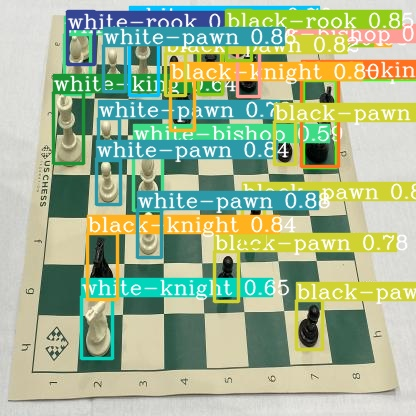

In [10]:
from IPython.display import Image #this is to render predictions
Image(filename='/content/drive/MyDrive/code/q03/YOLOv6/runs/inference/exp/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.7c134acea5ef5e18aa75defc069dc1ee.jpg', width=1000)